# Loan Data Exploration
### by Ugwuonah Faustina
### Introduction
This document explores a dataset containing information on loan disbursement activities by prosper loan agency over from 2005 to 2014.

### Preliminary Wrangling

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Above, the necessary libraries were imported and the file containing the dataset was read in with pandas as loan_data below

In [2]:
#Read the csv file containing the data
loan_data = pd.read_csv('prosperLoanData.csv')
#test
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [3]:
#Dropping all unnecessary columns from the loan dataset
loan_data.drop(['ListingKey', 'CreditGrade', 'ClosedDate', 
               'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield', 
               'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 
               'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatusDuration', 
               'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 
               'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 
               'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
               'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 
               'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 
               'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 
               'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 
               'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 
               'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 
               'LoanKey', 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 
               'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 
               'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 
               'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate', 
               'LoanOriginationQuarter', 'MemberKey', 'LP_CustomerPayments', 
               'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 
               'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
               'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 
               'Investors'], axis = 1, inplace = True)

The loan dataset contained 81 columns which were not all necessary so columns that were not needed were dropped and the new dataset is seen below

In [4]:
#test to see the dataset
loan_data.head(6)

,ListingNumber,ListingCreationDate,Term,LoanStatus,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,MonthlyLoanPayment,InvestmentFromFriendsCount,InvestmentFromFriendsAmount
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.1380,0,CO,Other,Self-employed,3083.333333,NaN,NaN,9425,330.43,0,0.0
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.0820,2,CO,Professional,Employed,6125.000000,NaN,NaN,10000,318.93,0,0.0
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.2400,0,GA,Other,Not available,2083.333333,NaN,NaN,3001,123.32,0,0.0
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.0874,16,GA,Skilled Labor,Employed,2875.000000,NaN,NaN,10000,321.45,0,0.0
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.1985,2,MN,Executive,Employed,9583.333333,1.0,11.0,15000,563.97,0,0.0
5,1074836,2013-12-14 08:26:37.093000000,60,Current,0.1214,1,NM,Professional,Employed,8333.333333,NaN,NaN,15000,342.37,0,0.0


In [5]:
#Using the rename function to replace all spaces with _ and set all column headers to lowercase
loan_data.rename(columns=lambda x:x.strip().lower().replace(" ","_"), inplace=True)
#changing the name of the column listing category
loan_data=loan_data.rename(columns={'listingcategory_(numeric)':'category'})
#Test
loan_data.head(2)

,listingnumber,listingcreationdate,term,loanstatus,lenderyield,category,borrowerstate,occupation,employmentstatus,statedmonthlyincome,totalprosperloans,ontimeprosperpayments,loanoriginalamount,monthlyloanpayment,investmentfromfriendscount,investmentfromfriendsamount
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.138,0,CO,Other,Self-employed,3083.333333,NaN,NaN,9425,330.43,0,0.0
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.082,2,CO,Professional,Employed,6125.000000,NaN,NaN,10000,318.93,0,0.0


Column headers with spaces between the words were changed to fit '_' in those spaces and the category column was named thus. Below, the date column was changed to datetime and then the time was removed leaving only the date.

In [6]:
#Converting the datatype of the listing creation date to datetime and removing the time
loan_data['listingcreationdate']=pd.to_datetime(loan_data['listingcreationdate'])
loan_data['listingcreationdate'] = pd.DatetimeIndex(loan_data['listingcreationdate']).date
#Test
loan_data.head(2)

,listingnumber,listingcreationdate,term,loanstatus,lenderyield,category,borrowerstate,occupation,employmentstatus,statedmonthlyincome,totalprosperloans,ontimeprosperpayments,loanoriginalamount,monthlyloanpayment,investmentfromfriendscount,investmentfromfriendsamount
0,193129,2007-08-26,36,Completed,0.138,0,CO,Other,Self-employed,3083.333333,NaN,NaN,9425,330.43,0,0.0
1,1209647,2014-02-27,36,Current,0.082,2,CO,Professional,Employed,6125.000000,NaN,NaN,10000,318.93,0,0.0


In [7]:
#Dropping all duplicates
loan_data.drop_duplicates(inplace=True, ignore_index=True)
#Test
sum(loan_data.duplicated())

0

Duplicates were dropped and a test was carried out to check if it worked. Numbers after the decimal were then sliced off for efficiency. After this, a copy of the loan_data named loan was created.

In [8]:
#Slicing numbers after the decimal point from the monthly income column
loan_data.statedmonthlyincome=loan_data.statedmonthlyincome.astype(str).str[:4].str.pad(7, fillchar=' ')
#Test
loan_data.head(2)

,listingnumber,listingcreationdate,term,loanstatus,lenderyield,category,borrowerstate,occupation,employmentstatus,statedmonthlyincome,totalprosperloans,ontimeprosperpayments,loanoriginalamount,monthlyloanpayment,investmentfromfriendscount,investmentfromfriendsamount
0,193129,2007-08-26,36,Completed,0.138,0,CO,Other,Self-employed,3083,NaN,NaN,9425,330.43,0,0.0
1,1209647,2014-02-27,36,Current,0.082,2,CO,Professional,Employed,6125,NaN,NaN,10000,318.93,0,0.0


In [9]:
#Making a copy of the dataset
loan=loan_data.copy()
#Test
loan.describe()
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listingnumber                113066 non-null  int64  
 1   listingcreationdate          113066 non-null  object 
 2   term                         113066 non-null  int64  
 3   loanstatus                   113066 non-null  object 
 4   lenderyield                  113066 non-null  float64
 5   category                     113066 non-null  int64  
 6   borrowerstate                107551 non-null  object 
 7   occupation                   109537 non-null  object 
 8   employmentstatus             110811 non-null  object 
 9   statedmonthlyincome          113066 non-null  object 
 10  totalprosperloans            21923 non-null   float64
 11  ontimeprosperpayments        21923 non-null   float64
 12  loanoriginalamount           113066 non-null  int64  
 13 

### What is the structure of your dataset?
There are 113,066 different loans that have been acquired from prosper loan agency and 15 columns holding information on the borrowers such as occupation of borrower, state of residence (borrowerstate), and reason for taking out the loan (category). The category variable is numeric representing the category of the listing that the borrower selected when posting their listing as follows:
0 - Not Available, 
1 - Debt Consolidation, 
2 - Home Improvement, 
3 - Business, 
4 - Personal Loan, 
5 - Student Use, 
6 - Auto, 
7 - Other, 
8 - Baby&Adoption, 
9 - Boat, 
10 - Cosmetic Procedure, 
11 - Engagement Ring, 
12 - Green Loans, 
13 - Household Expenses, 
14 - Large Purchases, 
15 - Medical/Dental, 
16 - Motorcycle, 
17 - RV, 
18 - Taxes, 
19 - Vacation, 
20 - Wedding Loans
The term variable is in months while the borrower state variable contains the abbreviations of the respective states.

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in finding out the demographic that is most beneficial to the company, I also want to know the year most profitable and what loan amount produces more yield.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I believe lender yield is the most important variable as it cuts accross all three features of interest. Other variables that support lender yield are loan original amount, borrower state, loan status, occupation, employment status, stated montly income and listing creation date.

#### Univariate Exploration
I'll start by looking at the listing creation date to know the period of higher interest in this dataset.

In [10]:
#Change the date time format from dd/mm/yy to just year 
loan['listingcreationdate']=pd.to_datetime(loan['listingcreationdate'])
loan['listingcreationdate'] = pd.DatetimeIndex(loan['listingcreationdate']).year

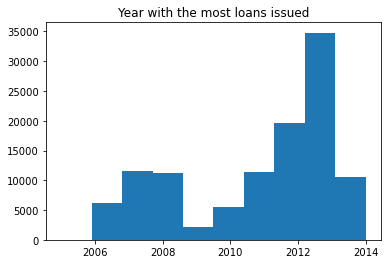

In [11]:
# plotting the histogram

plt.hist(data=loan, x='listingcreationdate')
plt.title('Year with the most loans issued');

I decided to begin by checking the number of years Prosper loan has been running operations and the year that had the most clients. As seen above, 2013 was their best year so far according to the data provided with about 35,000 loans issued. Hence, I decided to check the employment status of most clients to know if this increase in 2013 and all loans borrowed over the years was due to a lack of income or not.

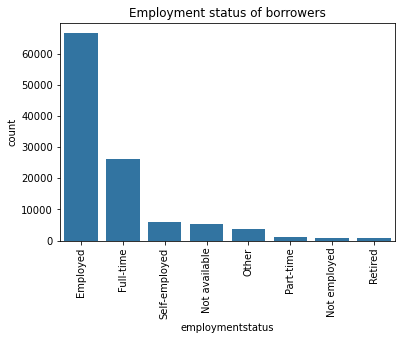

In [12]:
#Univariate plotting for employment status to check the financial dependency of majority of the borrowers
color=sns.color_palette()[0]
order=loan['employmentstatus'].value_counts().index
sns.countplot(data=loan, x='employmentstatus',color=color, order=order)
#To rotate the xticks 
plt.xticks(rotation=90)
plt.title('Employment status of borrowers');

The visualization above shows the distribution of the employemt status of majority of the borrowers, It tells that a majority of them are employed. However, There are various terms in the table above that also mean employed such as full time and part time. In order to view the gap between employed and unemployed, all these terms will be assigned to one word, 'Employed' or 'Unemployed' before it is then plotted.

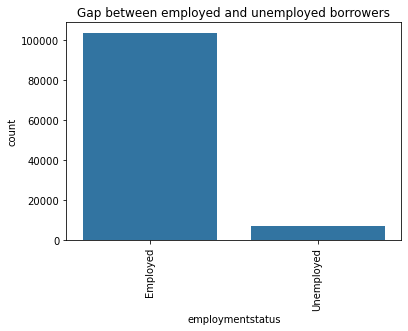

In [13]:
#To visualize the actual gap between borrowers that are employed and unemployed. 
#Other is assumed to part of the employed group as it is possible that contract workers may fall under that group.
employed=['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Other']
unemployed=['Retired', 'Not employed', 'Not available']
loan.employmentstatus.replace(to_replace=employed, value='Employed', inplace=True )
loan.employmentstatus.replace(to_replace=unemployed, value='Unemployed', inplace=True )

sns.countplot(data=loan, x='employmentstatus', color=color)
plt.xticks(rotation=90)
plt.title('Gap between employed and unemployed borrowers');

The plot above shows clearly the gap between the employed and the unemployed as over 10,000 borrowers are counted to be employed while the unemployed count of below 20,000. This indicates that so many loan borrowers may find it easy to pay back the loan. Let us look at the number of borrowers that have completed their loan

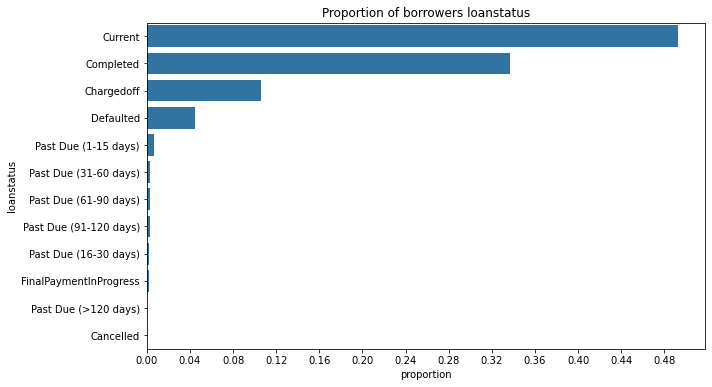

In [14]:
# To find out the number of borrowers that are paying their loan and those that have completed
plt.figure(figsize=[10,6])
loan_counts = loan['loanstatus'].value_counts()
loan_order = loan_counts.index
    # Compute largest proportion
    # Returns the sum of all not-null values in `loanstatus` column
n = loan['loanstatus'].value_counts().sum()
max_count = loan_counts[0]
max_prop = max_count / n
    # establish tick locations and create plot
base_color = sns.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.04)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
base_color = sns.color_palette()[0]
sns.countplot(data = loan, y = 'loanstatus', color = base_color, order = loan_order)
plt.xticks(tick_props * n, tick_names)
plt.xlabel('proportion')
plt.title('Proportion of borrowers loanstatus');

The above plot shows that a greater number of clients are still currently paying back their loans and a few in comparison to the total are defaulters. However, none of the accounts over the years have been charged off or been due past 120 days which could possibly indicate the stable financial background of the clients. As a result, I want to look at their backgrounds, to know where majority are from.

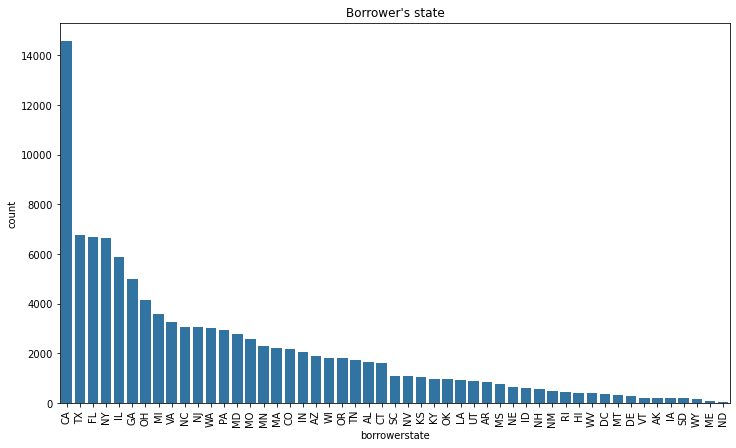

In [15]:
# Using seaborn's countplot function to plot a distribution of the states
plt.figure(figsize=[12,7])
color=sns.color_palette()[0]
order=loan['borrowerstate'].value_counts().index
sns.countplot(data=loan, x='borrowerstate',color=color, order=order)
plt.xticks(rotation=90)
plt.title("Borrower's state");

It is shown above that a great number of clients(>14,000) come from California, this is followed by Texas, Florida and New York. This could be due to better marketing strategies in California or it could be that the company has its headquaters in california and more resources are moved there. North Dakota on the other hand, has brought in only a few clients this could be due to the company recently starting up there. In all, the visualization above confirms that the Prosper loan company is a fast growing company with a lot of offices all over the U. S. Bearing this in mind, I decided to find out the reason why most people borrowed the money

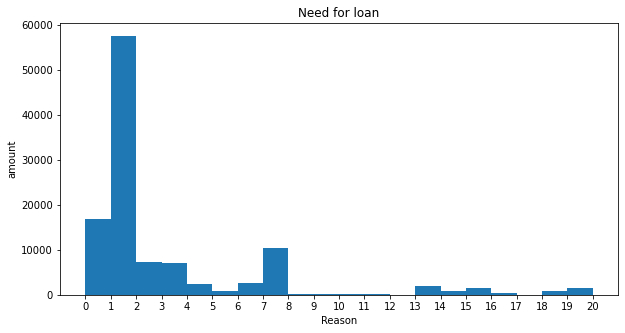

In [16]:
# Setting the bins before plotting
binsize = 1
bins = np.arange(0, 20+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'category', bins = bins)
plt.xticks(np.arange(0, 20+1, step=1))
plt.xlabel('Reason')
plt.ylabel('amount')
plt.title("Need for loan")
plt.show();

The category variable is numeric, these numbers (1-20) represent different reasons for taking out the loan. According to the table above, reason 1(Debt Consolidation) was the most common reason for taking out a loans, which suggests debt accumulation amongst clients. The least reasons for taking out loans were reasons 12(Green Loans) and 17(RV). To find out just how much a majority of clients were taking out, 'loanoriginalamount'  was plotted to find the most common amount that is borrowed

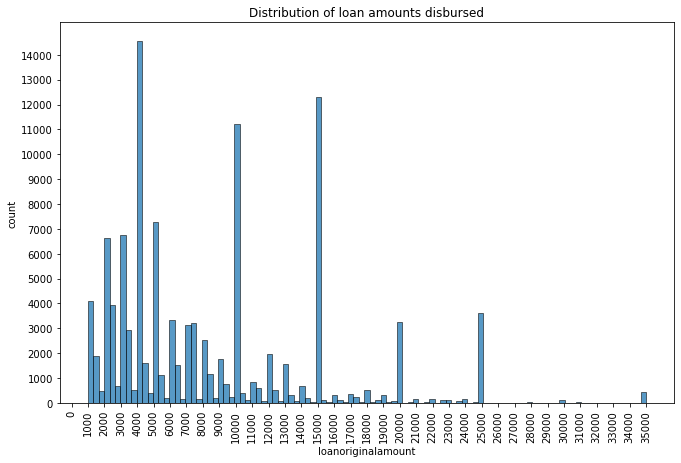

In [17]:
# To visualize the most common amount borrowed
plt.figure(figsize=[11,7])
color=sns.color_palette()[0]

sns.histplot(loan['loanoriginalamount'], kde=False);
plt.ylabel('count')
plt.yticks(np.arange(0, 14500+1, step=1000))
plt.xticks(np.arange(0, 35000+1, step=1000), rotation=90)
plt.title('Distribution of loan amounts disbursed');

Original amount collected in loan was plotted to discover the amount of loans a majority of the people take out. It was shown that the most collected loan amount was 4,000 dollars followed by 15,000 dollars. The biggest amount borrowed which was 35,000 had less than 1000 clients. Adding credence to the fact that the majority of loans so far may have been easy to payback as they are small scale, I was curious as to how long Prosper loans gives most of their customers to pay back.


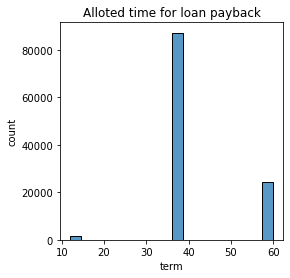

In [18]:
# Using histplot to plot the term variable 
# Set figsize and color before plotting the histplot
plt.figure(figsize=[4,4])
color=sns.color_palette()[0]
sns.histplot(loan['term'], kde=False, color=color);
plt.ylabel('count')
plt.title('Alloted time for loan payback');

Using the histplot function, the term was plotted to find that there were three major options when taking the loan; twelve months, thirty six months and sixty months. Most of the clients chose thirty six months, possibly due to the fact that twelve months may be too short to pay up on time and sixty months may be too far, incuring more interest to the original amount. This enabled clients pay up on time, over an adequate period of time and could be attributed to the record of loans being paid on time with no charged off accounts over the years. As a result, I decided to figure out the occupation most common amongst their clients 

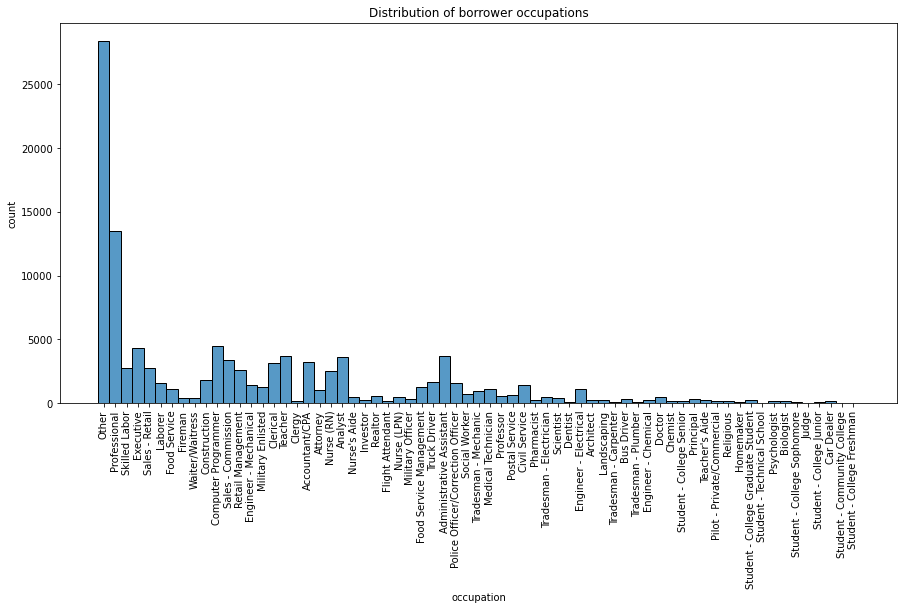

In [19]:
#Figure size was increased as the number of occupations were too many for a normal plot size
plt.figure(figsize=[15,7])
color=sns.color_palette()[0]

sns.histplot(loan['occupation'], kde=False);
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of borrower occupations');

Most of the Prosper loan clients were found to belong to the 'other' group. This is followed by clients who were engaged in professional work and then, executives, computer programmers and administrative assistants.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables visualized above gave more information about the demographic of the clients such as the fact that most clientsare employed in California as mostly proffesionals, executives or computer programmers where they took out loans of mostly 4000 or 15,000 dollars with Prosper Loan for thirty six months and are mostly still paying up. 
The second and third variable of interest concerning yield will be addressed in the bivariate section.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The x ticks on the loan status variable plot was not spaced for easy understanding so instead of just changing the ticks manually, I rather used proportions to evenly space out the ticks for efficient understanding when viewing the visualization.

### Bivariate Exploration
I will begin by comparing the 'lender yield' and 'listing creation date' variables to shed more light on the most profitable year.

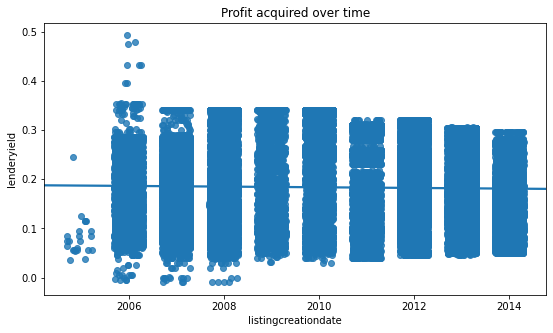

In [20]:
plt.figure(figsize = [9, 5])
#Plotting a scatter plot with jitter
sns.regplot(data = loan, x = 'listingcreationdate', y = 'lenderyield', truncate=False, x_jitter=0.3)
plt.title('Profit acquired over time');

The above plot indicates that in 2006, the company had the highest yields and that over the years, the yield has reduced with the most recent year 2014, having the lowest yield in comparison. Taking this further, I decided to find out if higher loans given out equal higher yield for the company.

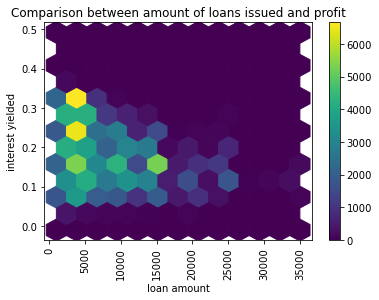

In [21]:
#To know the amount borrowed that brought the most yield and to find out if higher prices bring higher yields

plt.hexbin(data=loan, x='loanoriginalamount', y='lenderyield', gridsize=12)
plt.colorbar()
plt.xlabel('loan amount')
plt.ylabel('interest yielded')
plt.xticks(rotation=90)
plt.title('Comparison between amount of loans issued and profit');

The hexagonal bin plot shows that the higher loans given out do not equate higher yield as the loans of 5000 dollars and below are shown to have the highest yields of >0.3%. The declining yield by year could possibly be as a result of bigger loans being issued in recent times.

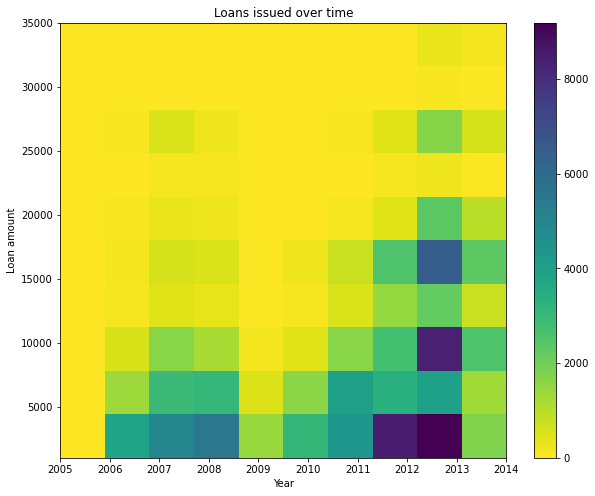

In [22]:
#To find out how the price of loan given out has increased or decreased with time
plt.figure(figsize=[10,8])

h2d = plt.hist2d(data =loan, x = 'listingcreationdate', y = 'loanoriginalamount', cmap='viridis_r')

plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Loan amount')
plt.title('Loans issued over time');

From the plot above, it was found that the in recent years, higher amounts have been issued. In 2013, 25,000 dollars was issued most frequently and as seen above, higher amounts do not necessarily result in higher yield. This possibly took a toll causing 2014 to be the lowest yielding year. The year with the most money paid back was the plotted for to see if it also affected yield.

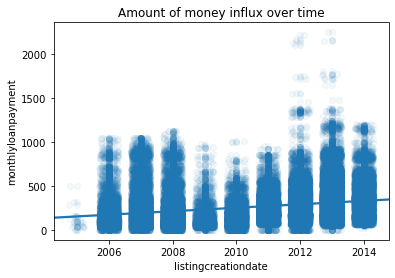

In [23]:
#The year was plotted against the monthly amount paid to see what year had the most money paid back
sns.regplot(data = loan, x = 'listingcreationdate', y = 'monthlyloanpayment', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.scatter(data = loan, x = 'listingcreationdate', y = 'monthlyloanpayment', alpha=1/20)
plt.title('Amount of money influx over time');

Coincidentally, the years with lowest yield which are 2012, 2013 and 2014 have higher payback. Monthly payback increased with year as shown through the linear regression model fit in the plot. Hence we can see that higher money paid back does not equal a higher profit. The state with the most yield was then plotted to discover which state was most favourable to give loans to and which was not. 

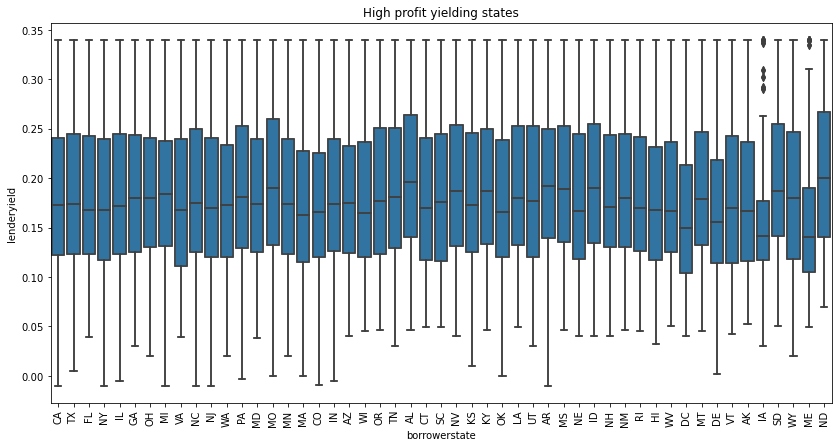

In [24]:
#Comparing borrowerstate to lender yield to know which state is more beneficial
states = ['CA', 'TX', 'FL', 'NY', 'IL', 'GA', 'OH', 'MI', 'VA', 'NC', 'NJ', 'WA', 'PA', 'MD', 'MO', 'MN', 'MA', 'CO', 'IN', 'AZ', 'WI', 'OR', 'TN', 'AL', 'CT', 'SC', 'NV','KS', 'KY', 'OK', 'LA', 'UT', 'AR', 'MS', 'NE', 'ID', 'NH', 'NM', 'RI', 'HI', 'WV', 'DC', 'MT', 'DE', 'VT', 'AK', 'IA', 'SD', 'WY', 'ME', 'ND']

category = pd.api.types.CategoricalDtype(ordered=True, categories=states)

# Use pandas.astype() to convert the "borrowerstate" column from a plain object type into an ordered categorical type 
loan['borrowerstate'] = loan['borrowerstate'].astype(category);

plt.figure(figsize = [14, 7])
base_color = sns.color_palette()[0]

sns.boxplot(data=loan, x='borrowerstate', y='lenderyield', color=base_color)
ax1 = sns.boxplot(data=loan, x='borrowerstate', y='lenderyield', color=base_color)
plt.xticks(rotation=90)
plt.title('High profit yielding states')
plt.ylim(ax1.get_ylim());

Most of the states seemed to produce a high yield. However, Iowa and Maine seemed to have yielded higher than the rest of the states. Even though these points are outliers, they are still the highest points in the map. While North Dakota has the highest lower boundary suggesting a high yield from the state. The employment status was then compared with the loan status to see if the employed were paying back their loans in comparison with the unemployed. 

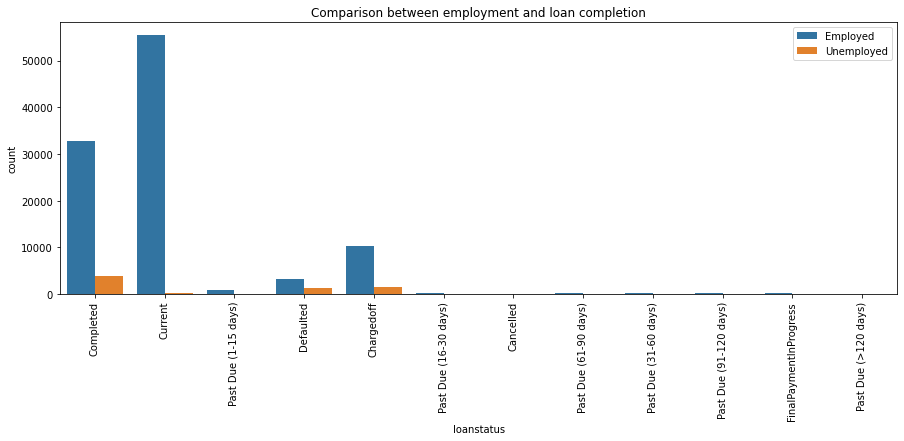

In [25]:
#Finding out if employed people are more likely to complete their loans
plt.figure(figsize=[15,5])
sns.countplot(data = loan, x = 'loanstatus', hue = 'employmentstatus')
plt.xticks(rotation=90)
plt.title('Comparison between employment and loan completion')
plt.legend(loc='upper right');

Employed people were shown to be currently paying more, to have completed their loans but also to have defaulted more. This could be due to the fact employed people take out loans more than unemployed people so the prosper loan dataset hqas more employed than unemployed borrowers. To see this more clearly, monthly income will be plotted against loan status to know if high income earners are more likely to complete their loan than low income earners. 

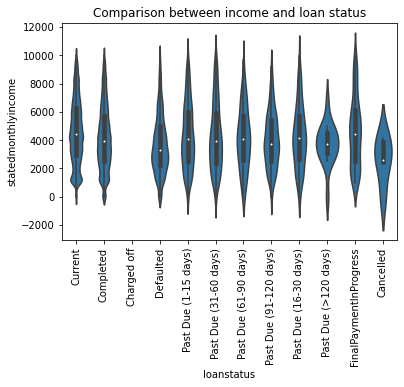

In [26]:
#Changing the datatype of stated monthly income to float
loan['statedmonthlyincome']=loan['statedmonthlyincome'].astype(float)

#Comparing the income level with the loan status to find out if higher pay and quicker payback have a relationship
loan_stat = ['Current', 'Completed', 'Charged off', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)', 'Past Due (>120 days)', 'FinalPaymentInProgress', 'Cancelled']
status = pd.api.types.CategoricalDtype(ordered=True, categories=loan_stat)

# Using pandas.astype() to convert the "loanstatus" column from a plain object type into an ordered categorical type 
loan['loanstatus'] = loan['loanstatus'].astype(status);
base_color = sns.color_palette()[0]
sns.violinplot(data=loan, x='loanstatus', y='statedmonthlyincome', color=base_color, inner='box')
plt.title('Comparison between income and loan status')
plt.xticks(rotation=90);

Due to the box plots in the middle of the violin plots, the median can be seen. Majority of people who defaulted are seen to earn between 2000 and 4000 dollars monthly. People who have completed their loans are seen to recieve between 0 to 10,000 dollars, the number of high income earners who have completed their loan are more than the low income earners while the number of high income earners currently paying off are the loan seem to be almost equal to the number of low income earners. The Highest income earners though, are seen to either be past their due date by 61-90 days, 16- 30 days or making their final payments. The lowest income earners are seen to have their loan cancelled, or are past due 120 days. This indicates that a majority of higher income earners pay off their loan on time in comparison to low income earners.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The lender yield was found to decrease by year, as 2006 had the highest yield for the company but 2014 was the lowest in yield by comparison. However, when plotted against loan amount in a hexbin, it was seen to increase when a majority of smaller loans are issued out. This suggested that with time, Prosper loans began issuing out bigger loans which caused a decline. When plotted against state, most of the states had the same upper boundary in yield except for some outliers in Maine and Iowa. On the other hand, North dakota had the highest lower boundary, indicating a higher overall yield.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between the year of loan issuing and the amount issued, gave a possible reason to the decrease of lender yield over time as the bigger loans were shown to be issued mostly in 2012 and 2013 while smaller loans were given mostly in the company's early years. Interestingly, when the year was plotted against montly pay by the borrowers, years with a higher payback were 2012, 2013 and 2014 suggesting that high payback does not correlate to high yield. The was a small interaction between the employment status and the loan status. In this case, employed were shown to have completed their payments more and to be currently paying more but this seemed vague so the monthly income plotted against loan status was used to show the difference between high income earners and low income earners in the payment of their loans. The Highest income earners, were seen to either be past their due date by 61-90 days, 16- 30 days or making their final payments while the lowest income earners were seen to have their loan cancelled, or are past due 120 days.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how occupation, state, year and original loan amount are related to lender yield.

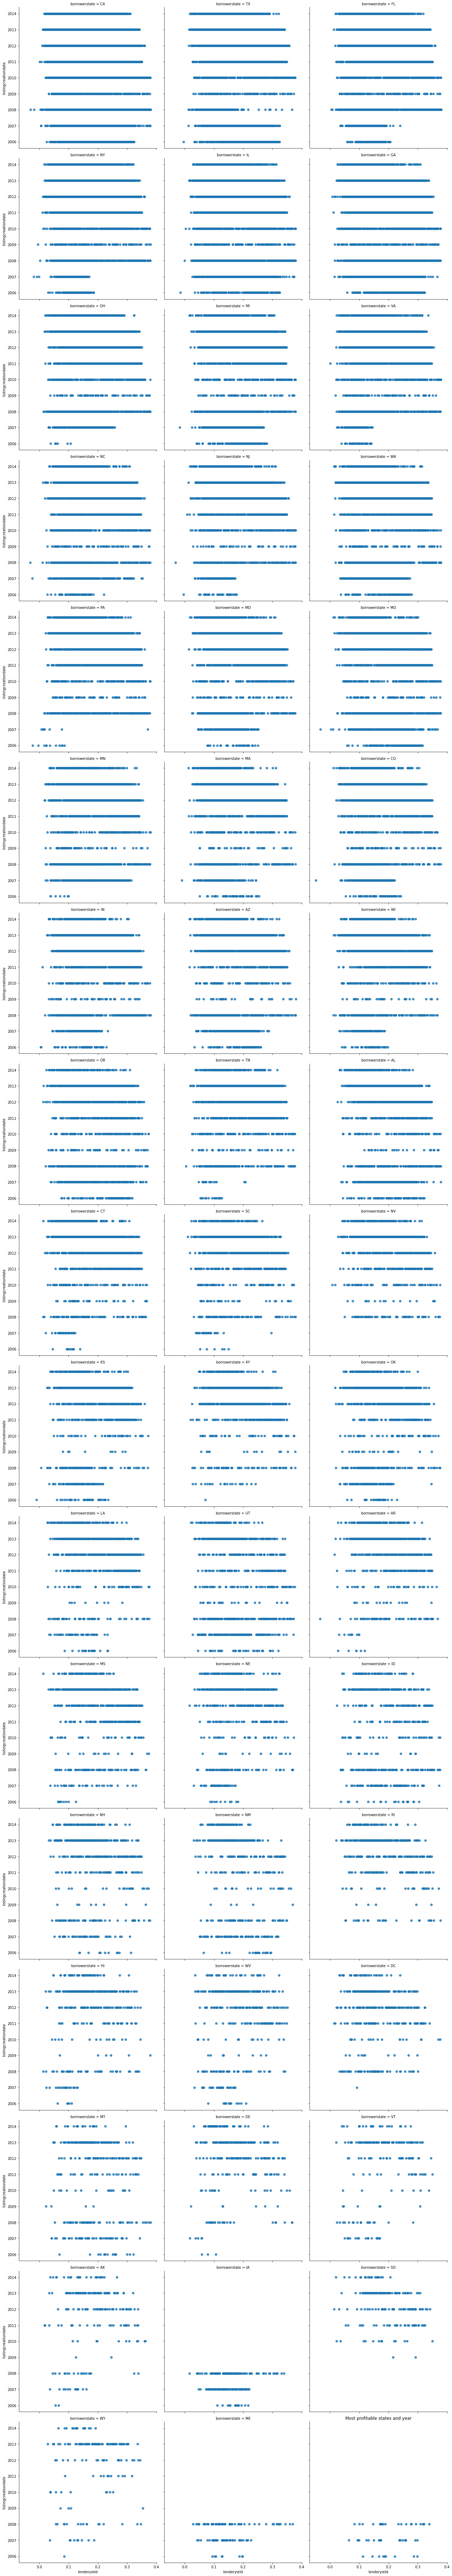

In [27]:
sns.lmplot(x='lenderyield', y='listingcreationdate', col='borrowerstate',
           data=loan, fit_reg=False, height=6, col_wrap=3, x_jitter=0.04)
ax = plt.gca() 
ax.set_title('Most profitable states and year', loc='center');

The trend noticed from the above plot indicates that as you scroll down the states, the number of loans issued reduces which means that the states with the most loans issued are at the top(California, Texas and Florida) while the states where the least loans issued have been issued are Wyoming, Maine and South Dakota. In majority of the states, it is noticed that in recent years from 2012 to 2014 a lot more loans were issued, however, the profits in these years is shown to reduce accross all states. Meanwhile the years 2008, 2009 and 2009, are seen to yield the most profit, while 2006 and 2014 are the years with the least profit accross all states.

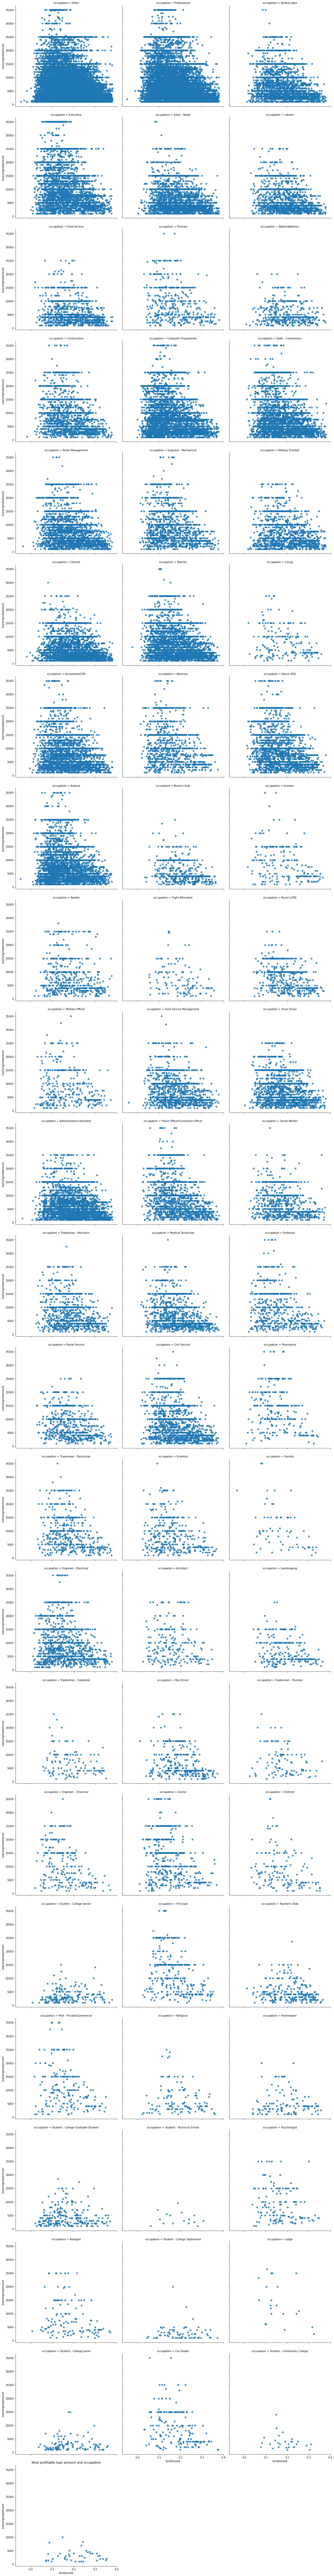

In [28]:
sns.lmplot(x='lenderyield', y='loanoriginalamount', col='occupation', 
           data=loan, fit_reg=False, height=6, col_wrap=3, x_jitter=0.04)
ax = plt.gca() 
ax.set_title("Most profitable loan amount and occupation", loc='center');

In the above plot, showed that borrowers who are engaged in professional work, skilled labor and other were most likely totake out loans while car dealers, community college students and college freshmen were the least likely. Accross all professions, it is seen that the higher the amount collected, the lower the yield. It was also noticed that all students took out loans below 20,000 but the other occupations took out higher loans of up to 35,000

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From this section, Issued loan amount was seen to negatively correlate with yield as increase in amount caused a decrease in yield accross all occupations. It was also found that more recent years have lower profit yield. In a majority of the states, profits peaked in the years 2008, 2009 and 2010 , mostly reaching 0.35% in and then dropped as from 2011. Generally, previous years yielded higher profits with the exception of 2006. 

### Were there any interesting or surprising interactions between features?

> Looking back on the plots, more advantagous occupations took out more loans than less priviledged communities such as all student communities and homemakers. Also, Maine, North Dakota and Iowa did not have any records of issued loans since 2008, even though 2008 recorded the highest profits in those states. On the other hand, South Dakota, Rhode Island and Nevada did not have any records for loans issued before the years 2010, 2008 and 2007 respectively.

## Conclusions
>The Prosper loan data was gathered, wrangled and used to plot visualizations with the following features of interest in mind: The demographic that is most beneficial to the company, the year most profitable to the company and the loan amount that produces the most yield. After visualizations, It was discovered that the demographic most beneficial to the company are borrowers mostly students in California who take out loans of 5000 dollars and below. This is because a greater percent of their customer base were mostly residents of California and the student communities wherein majority was recorded to take loans below 5000 dollars. California could also have more clients a result of more efficient marketing protocols put in place and the fact that it could be the headquaters of the company, hence existing for longer than other branch offices. California is also the state with the highest loans issued, closely followed by Texas and Florida. The company was seen to be in the beginning stages in the year 2006 as that was one of the lowest profit yielding years on record. This was not the case for too long as the company quickly grew in profit and by the year 2008, the company saw the first of peak profit on record. 2009 and 2010 were also quite similar as profits were up to 0.35% reached. However, for a majority of the states, profits began to drop from the more recent years of 2011 to 2014. The cause of this drop was attributed to the size of loans that were issued in the more recent years (2011-2014) as it was seen that the amount issued out in loans began to increase in these years. The loan amount that produced the most yield was 5000 dollars and below and when loan amount was compared to yield, loans less than or equal to 5000 dollars were found to yield a lot more than loans greater than 5000. This is believed to be the reason why 2014 had the least yield after 2006. To increse yield, it would be advisable for more efficient marketing strategies to be devised such as the one used in California and targeted to directed at all occupations especially student and homemaker populations. It would also be advisable that smaller loans be issued out more than bigger loans in general.

## Limitations
The limitations to this dataset mostly came from vague data entries such as the use of the category 'Other' in the occupations column and from negligible data such as the little data from 2005 that was too little to be recognised in most of the analyses.
